### **Chuẩn bị dữ liệu:**
##### Giả sử có file excel 'bang_diem.xlsx' chứa dữ liệu điểm 'Toán', 'Lý" của 3 lơp 'K18A1', 'K18A2', và 'K18A3'.Chúng ta đọc dữ liệu từ file .xlsx và chuyển vào một DataFrame để thực hiện phân tích dữ liệu.
##### **Lưu ý:** để đọc file .xlsx bằng pandas thì cần cài engine `openpyxl`.

>Kiểm tra xem đã có egine openyxl?

In [9]:
# 1. Kiểm tra openpyxl đã cài chưa
import importlib
try:
    import openpyxl
    print("openpyxl đã được cài đặt, phiên bản:", openpyxl.__version__)
except ImportError:
    print("Chưa cài openpyxl")

openpyxl đã được cài đặt, phiên bản: 3.1.5


In [10]:
!pip install openpyxl


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Xuất hiện dòng**
>Successfully installed et-xmlfile-2.0.0 openpyxl-3.1.5
##### Quá trình cài đặt thành công!

In [11]:
import pandas as pd

# Đọc file Excel
diem_df = pd.read_excel('bang_diem.xlsx')

# Hiển thị 5 dòng đầu tiên để kiểm tra
print(diem_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'bang_diem.xlsx'

# 4.8. Thống kê và phân nhóm dữ liệu với Pandas
Tiết 9 – Chương 4: Pandas

Trong mục này, chúng ta sẽ ôn lại một số hàm thống kê mô tả cơ bản và cách **gom nhóm (groupby)** dữ liệu trong Pandas, sau đó áp dụng vào một **case study dữ liệu dân số và diện tích một số tỉnh/thành phố Việt Nam giai đoạn 2019–2021**.

## 4.8.1. Thống kê dữ liệu: Phương thức `describe()`

##### Phương thức describe() được sử dụng để tạo một tóm tắt thống kê mô tả của dữ liệu trong DataFrame. Nó cung cấp các thông số thống kê quan trọng về các **cột số học.**
- `count`: số lượng quan sát
- `mean`: điểm trung bình
- `std`: độ lệch chuẩn
- `min`, `max`: điểm thấp nhất, cao nhất
- `25%`, `50%`, `75%`: các **tứ phân vị** (quartiles)

#### **Ví dụ 4.8.1.1** sử dụng một DataFrame đơn giản gồm ba cột: Tuổi, Chiều cao, Cân nặng.

In [12]:
import pandas as pd

data = {
    'Tuổi': [16, 17, 16, 18, 17],
    'Chiều cao': [165, 170, 160, 172, 168],
    'Cân nặng': [55, 60, 52, 65, 58]
}

df = pd.DataFrame(data)
df

,Tuổi,Chiều cao,Cân nặng
0,16,165,55
1,17,170,60
2,16,160,52
3,18,172,65
4,17,168,58


Kết quả thống kê mô tả:

In [13]:
# Thống kê mô tả
df.describe()

,Tuổi,Chiều cao,Cân nặng
count,5.00000,5.000000,5.000000
mean,16.80000,167.000000,58.000000
std,0.83666,4.690416,4.949747
min,16.00000,160.000000,52.000000
25%,16.00000,165.000000,55.000000
50%,17.00000,168.000000,58.000000
75%,17.00000,170.000000,60.000000
max,18.00000,172.000000,65.000000


In [14]:
df.info

<bound method DataFrame.info of    Tuổi  Chiều cao  Cân nặng
0    16        165        55
1    17        170        60
2    16        160        52
3    18        172        65
4    17        168        58>

#### **Phân tích**
* ##### Cột Tuổi có độ lệch chuẩn thấp → nhóm tuổi khá đồng đều.
* ##### Cột Chiều cao có mức min–max 160–172 → độ trải tương đối rõ.
* ##### Cột Cân nặng phân bố ổn định quanh mức trung bình 58 kg.
#### **Nhận xét:**
>`describe()` là cách nhanh nhất để kiểm tra “bức tranh tổng quan” của dữ liệu trước khi bước vào phân nhóm, tổng hợp hay trực quan hóa.

#### 🔹 **Khái niệm IQR (Interquartile Range)**
Ngoài các thống kê cơ bản, describe() còn trả về các tứ phân vị:
* #### **25% (Q1)** – tứ phân vị thứ nhất
* #### **50% (Median)** – trung vị
* #### **75% (Q3)** – tứ phân vị thứ ba
#### Từ hai giá trị Q1 và Q3, chúng ta tính được IQR (Interquartile Range) là “khoảng tứ phân vị:" 
#### IQR = Q3 - Q1 

>IQR biểu diễn độ trải rộng của 50% dữ liệu nằm giữa Q1 và Q3 (vùng dữ liệu trung tâm):

* IQR nhỏ → 50% dữ liệu trung tâm tập trung sát nhau, thể hiện mức độ đồng đều cao.

* IQR lớn → 50% dữ liệu trung tâm trải rộng hơn, thể hiện mức độ phân tán mạnh hơn.

#### **Ví dụ.** Minh họa IQR

In [ ]:
# Xét DataFrame ở ví dụ 5.8.8.1
df

,Tuổi,Chiều cao,Cân nặng
0,16,165,55
1,17,170,60
2,16,160,52
3,18,172,65
4,17,168,58


tính IQR cho cột Chiều cao trong DataFrame:

In [ ]:
q1 = df['Chiều cao'].quantile(0.25)
q3 = df['Chiều cao'].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(5.0)

**Giải thích:**
* Nếu IQR = 5 cm, điều này nghĩa là 50% số học sinh nằm trong khoảng cao từ Q1 đến Q3 có độ rộng 5 cm và nếu so sánh với lớp khác có IQR nhỏ hơn, *lớp nào IQR nhỏ hơn thì chiều cao của học sinh trong lớp đó đồng đều hơn*.
* Chỉ số IQR giúp đánh giá mức độ phân tán của dữ liệu một cách trực quan, ổn định và ít bị tác động bởi những giá trị bất thường.

## **4.8.1.2. Tính trung bình và độ lệch chuẩn theo cột**
##### Trong thống kê dữ liệu, hai chỉ số thường dùng nhất để mô tả đặc trưng của một biến số là:
* #### Giá trị trung bình (mean)
* #### Độ lệch chuẩn (standard deviation, std)
Pandas cung cấp các phương thức:
* #### df.mean() – tính trung bình theo từng cột
* #### df.std() – tính độ lệch chuẩn theo từng cột

#### **Ý nghĩa:**

* mean cho biết xu hướng trung tâm của dữ liệu (dữ liệu tập trung quanh mức nào).

* std cho biết mức độ phân tán:

  - std nhỏ → dữ liệu các giá trị gần nhau

  - std lớn → dữ liệu trải rộng hơn, biến động nhiều hơn

>Trong thực hành phân tích dữ liệu, mean và std thường được dùng trước khi tiến hành các bước phân nhóm hoặc phân tích sâu hơn.

## 4.8.2. Phân nhóm dữ liệu với `groupby()`

#### **groupby()** là phương pháp mạnh mẽ để thực hiện các phép tổng hợp dữ liệu dựa trên các *nhãn hoặc chỉ mục*.
#### **A.Nguyên tắc cốt lõi: Split-Apply-Combine**
Quá trình groupby() hoạt động theo nguyên tắc **Chia** - **Áp dụng** - **Kết hợp**:
####  1. **Chia** (Split):
  - Dữ liệu được chia thành các nhóm dựa trên một thuộc tính/nhãn cụ thể.
#### 2. **Áp dụng**(Apply):
  - Trên mỗi nhóm, ta áp dụng một hoặc nhiều hàm:
    - các hàm thống kê: sum(), mean(), min(), max(), count(), std(), …hoặc 
    - các hàm tự định nghĩa (qua agg(), apply(), …).
#### 3. **Kết hợp**(Combine):
  Các kết quả từ từng nhóm được kết hợp lại thành một cấu trúc dữ liệu mới (thường là một **DataFrame** hoặc **Series**), trong đó:
  - chỉ mục/nhãn phản ánh các nhóm,
  - giá trị là kết quả tính toán trên từng nhóm.

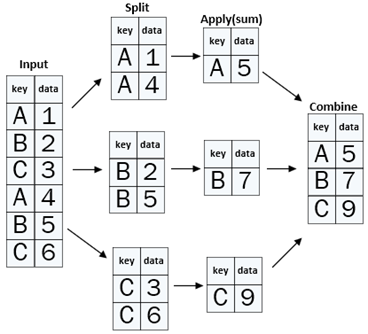

Hình 4.6. Minh họa trực quan phương thức groupby

### **B.Cơ chế Lazy Evaluation của groupBy**
* #### **df.groupby()** chỉ tạo ra một đối tượng DataFrameGroupBy đại diện cho việc nhóm dữ liệu, nhưng không thực hiện bất kỳ phép tính nào ngay lập tức.
* #### Việc **chia nhóm + tính toán**  *chỉ diễn ra* khi gọi phương thức hành động như:
    - Các hàm tổng hợp: sum(), mean(), min(), max(), count(), std(), agg(), describe(),... 
    - Hàm biến đổi: transform()
    - Hàm lọc nhóm: filter()
    - Hàm tổng quát: apply()

* #### vì vậy, GroupBy có hành vi giống Lazy Evaluation:

>####   *tạo đối tượng trước, trì hoãn thực thi cho đến khi cần kết quả.*


#### **Ví dụ 4.8.2.1**

In [15]:
# Tạo DataFrame đơn giản để minh họa groupby (Ví dụ 4.8.2.1)
df_data = {
    'key':['A','B','C','A','B','C'],
    'data':range(6)
}
df = pd.DataFrame(df_data, columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
# 1. Tạo đối tượng GroupBy (Chưa tính toán)
grouped = df.groupby('key')
print("Đối tượng GroupBy (Lazy Evaluation):", type(grouped))

Đối tượng GroupBy (Lazy Evaluation): <class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
# 2. Áp dụng phép tổng hợp (Tính toán thực tế)
print("\nKết quả sau khi áp dụng sum() (Bước Apply và Combine):")
print(grouped.sum()) #


Kết quả sau khi áp dụng sum() (Bước Apply và Combine):
     data
key      
A       3
B       5
C       7


In [ ]:
#Xem từng nhóm dữ liệu
grouped.get_group('A')          #các hàng có key='A" được gom thành một nhóm

,key,data
0,A,0
3,A,3


In [ ]:
grouped.get_group('B')

,key,data
1,B,1
4,B,4


In [ ]:
grouped.get_group('C')

,key,data
2,C,2
5,C,5


#### **C. Các tính năng cơ bản**
#### **Chỉ số cột – Columns indexing**:  
> Truy cập và thao tác với các cột dữ liệu sau khi đã phân nhóm.

#### **Ví dụ 4.8.2.2.**

In [ ]:
import pandas as pd

data = {'Tên hs':['Bình', 'Hoa','Minh','Lan','Vân'],
        'Môn':['Toán','Lý','Toán','Hóa','Lý'],
        'Điểm':[8,9,7,6,8]
}
df=pd.DataFrame(data)
df


,Tên hs,Môn,Điểm
0,Bình,Toán,8
1,Hoa,Lý,9
2,Minh,Toán,7
3,Lan,Hóa,6
4,Vân,Lý,8


In [ ]:
# Phân nhóm dữ liệu theo cột 'Môn'
grouped_mon = df.groupby('Môn')

In [ ]:
# Truy cập cột 'Điểm' của từng nhóm
for ten_mon, df_nhom in grouped_mon: #ten_mon: Là nhãn nhóm (dữ liệu chuỗi: 'Toán', 'Lý', 'Hóa').
                                     #df_nhom: Là dữ liệu của nhóm (đối tượng DataFrame có thể tính toán).
    print(f"Nhóm: {ten_mon} :")
    print(df_nhom[['Điểm']])

Nhóm: Hóa :
   Điểm
3     6
Nhóm: Lý :
   Điểm
1     9
4     8
Nhóm: Toán :
   Điểm
0     8
2     7


**Lặp qua các nhóm**

#### **Ví dụ 4.8.2.3**. Tạo DataFrame (6x3) có các cột 'key', 'giatri_1', 'giatri_2';
  - trong đó:
    - 'key' là danh sách các phần tử ['A','B','C','A','B','C']
    - gia_tri_1 là mảng 1 chiều ngẫu nhiên có 6 phần tử trong [10:100)
    - giatri_2 mảng 1 chiều có 6 phần tử các số nguyên ngẫu nhiên từ 0 đến 9

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        'key':['A','B','C','A','B','C'],
        'giatri_1':np.random.randint(10,100,6),
        'giatri_2':np.random.randint(0,10,6)
    },
    columns=['key','giatri_1','giatri_2']
)
print("df: \n",df)

df: 
   key  giatri_1  giatri_2
0   A        48         1
1   B        30         0
2   C        12         4
3   A        90         0
4   B        55         8
5   C        63         6


 * Dùng groupby('key') để chia bảng thành 3 nhóm theo giá trị của cột key (A, B, C).

In [ ]:
for key, giatri in df.groupby('key'):
    print("\nkey: ",key)
    print("value: \n",giatri)



key:  A
value: 
   key  giatri_1  giatri_2
0   A        48         1
3   A        90         0

key:  B
value: 
   key  giatri_1  giatri_2
1   B        30         0
4   B        55         8

key:  C
value: 
   key  giatri_1  giatri_2
2   C        12         4
5   C        63         6


**Chọn từng nhóm cụ thể:**
#### Sử dụng phương thức get_group(), phương thức get_group() được sử dụng trong đối tượng GroupBy để truy cập các nhóm con trong một nhóm đã được tạo bởi phương thức groupby().
Cú pháp: 
```Python
grouped = df.groupby('column_name')
grouped.get_group('group_value')
```
Trong đó:
  - 'column_name' là tên cột dùng để nhóm các dữ liệu.
  - 'group_value' là giá trị của nhóm mà người dùng muốn truy cập.



> Khi gọi get_group('group_value'), phương thức sẽ trả về một DataFrame mới chứa dữ liệu chỉ thuộc về nhóm có giá trị tương ứng.

#### **Ví dụ 4.8.2.4.**

In [ ]:
print(df.groupby('key').get_group('A'))

  key  giatri_1  giatri_2
0   A        63         8
3   A        71         8


## 4.8.3. Các hàm tổng hợp và biến đổi: 
##### Có 4 phương thức quan trọng nhất trên đối tượng GroupBy:
- `aggregate()` hoặc `agg()` → **tóm tắt nhóm** bằng nhiều thống kê.
- `transform()` → **giữ nguyên số dòng**, dùng để tạo thêm cột mới (chuẩn hóa, chuẩn bị dữ liệu ML,...).
- `filter()` → **giữ nguyên cấu trúc cột**, nhưng **bỏ bớt nhóm không thỏa điều kiện**.
- `apply()` → linh hoạt nhất, áp dụng một hàm tùy ý cho từng nhóm và trả về DataFrame/Series.

1. **Phương thức** aggregate()/agg()
  - Chức năng: thực hiện phép tổng hợp trên các nhóm và thu thập kết quả trong một 
  DataFrame mới. 
    - agg() là tên gọi khác (alias) của aggregate(), được dùng phổ biến hơn. Nó linh hoạt cho phép áp dụng nhiều hàm trên nhiều cột khác nhau.

#### **Ví dụ 4.8.2.5.** để tính tổng và trung bình giá trị của cột 'giatri_1' cho mỗi nhóm trong DataFrame df, chúng ta có thể sử dụng phương thức aggregate() như sau:

In [ ]:
df

,key,giatri_1,giatri_2
0,A,63,8
1,B,59,2
2,C,70,4
3,A,71,8
4,B,19,9
5,C,24,8


In [ ]:
grouped = df.groupby('key')
result = grouped.aggregate({'giatri_1': ['sum', 'mean']}) #Ap dụng hàm sum() , mean() trên cột giatri_1 theo từng nhóm
result

giatri_1      
         sum  mean
key               
A        134  67.0
B         78  39.0
C         94  47.0

#### **2. Phương thức agg():**
#### Sử dụng để thực hiện các phép tổng hợp trên các nhóm dữ liệu được tạo ra bởi phương thức groupby(). Tương tự như aggregate(), agg() cho phép người dùng áp dụng các phép tổng hợp đa dạng và tùy chỉnh cho từng nhóm dữ liệu.
#### **Kết quả** một DataFrame mới chứa các nhóm dữ liệu và các phép tổng hợp được áp dụng cho mỗi nhóm.
> #### Phương thức agg() có tính linh hoạt cao hơn so với aggregate() vì nó cho phép áp dụng các phép tổng hợp khác nhau cho các cột dữ liệu riêng lẻ hoặc sử dụng các phép tổng hợp tùy chỉnh thông qua hàm lambda.


#### **Ví dụ 4.8.2.6**. Minh họa phương thức agg()

In [ ]:
df

,key,giatri_1,giatri_2
0,A,63,8
1,B,59,2
2,C,70,4
3,A,71,8
4,B,19,9
5,C,24,8


In [ ]:
groupped = df.groupby('key')
result = grouped.agg(
    {
        #'giatri_1':sum, 'giatri_2':lambda x:x.mean() #truyền hàm python gốc 'sum' để tính tổng cột 'giatri_1' theo nhóm đã được nhóm
        'giatri_1':lambda x:x.sum(),  #việc phải tạo và gọi hàm lambda cho mỗi nhóm sẽ làm giảm hiệu suất so với cơ chế tối ưu hóa nội bộ của Pandas.
        'giatri_2':lambda x:x.mean()
    })
result

,giatri_1,giatri_2
key,,
A,134,8.0
B,78,5.5
C,94,6.0


In [ ]:
result = grouped.agg({'giatri_1': "sum", 'giatri_2': "mean"})       #Dùng Chuỗi ký tự ("sum" thay cho hàm python sum Đối với cột giatri_1) để tôi ưu hóa hiệu suất
result

,giatri_1,giatri_2
key,,
A,156,3.0
B,26,6.0
C,50,4.5


#### **3. Phương thức transform():**
Phương thức transform() trong Pandas được sử dụng để thực hiện các phép biến đổi trên các nhóm dữ liệu được tạo ra bởi phương thức groupby(). Nó cho phép áp dụng các phép biến đổi đa dạng cho từng phần tử trong mỗi nhóm và thu thập kết quả trong một Series hoặc DataFrame mới có cùng kích thước và cấu trúc với DataFrame gốc.
Trong khi aggregate trả về dữ liệu là một giá trị cụ thể được tính toán theo hàm đã cho, thì transformation sẽ trả về toàn bộ đầy đủ dữ liệu sau khi đã được biến đổi (transform).
##### Cú pháp:
```Python
grouped = df.groupby('column_name')
grouped.transform(function)
```
Trong đó:
  - 'column_name' là tên cột dùng để nhóm các dữ liệu.
  - ‘function’ là một hàm hoặc danh sách các hàm được áp dụng cho từng nhóm dữ liệu. 
    - Các hàm này có thể là các hàm tích hợp sẵn như sum, mean, count, min, max, hoặc các hàm do người dùng tự định nghĩa.


> Kết quả của phương thức transform() là một `Series` hoặc `DataFrame` mới có cùng kích thước và cấu trúc với DataFrame gốc, trong đó các giá trị ***được biến đổi dựa trên từng phần tử trong mỗi nhóm***.

#### **Ví dụ 4.8.2.7**: chuẩn hóa cột 'giatri_1' trong DataFrame bằng cách trừ giá trị trung bình của nhóm và chia cho độ lệch chuẩn của nhóm

In [ ]:
grouped = df.groupby('key')
normalized = (df['giatri_1'] - grouped['giatri_1'].transform('mean')) / grouped['giatri_1'].transform('std')
normalized

#### **4. Phương thức filter()**
#### Chức năng: 
  - sử dụng để lọc các nhóm dữ liệu dựa trên một điều kiện xác định. 
  - Nó cho phép người dùng chỉ giữ lại các nhóm dữ liệu thỏa mãn điều kiện và loại bỏ những nhóm không thỏa mãn điều kiện đó.
#### Cú pháp:
```python
grouped = df.groupby('column_name')
grouped.filter(function)
```
Trong đó:
  - `'column_name'` là tên cột dùng để nhóm các dữ liệu.
  - `‘function’` là một hàm xác định điều kiện để lọc các nhóm dữ liệu. Hàm này nhận vào một nhóm dữ liệu và trả về một giá trị Boolean cho mỗi nhóm.


>##### Kết quả của phương thức filter() là một DataFrame mới chứa các nhóm dữ liệu đã được lọc theo điều kiện.

>##### Phương thức filter() được sử dụng khi người dùng muốn chỉ giữ lại các nhóm dữ liệu thỏa mãn một số điều kiện nhất định.

#### **Ví dụ 4.8.2.8** Lọc các nhóm ‘giatri_2’ trung bình > 5, có thể sử dụng phương thức filter() như sau:

In [ ]:
# Lọc các nhóm có giá trị 2 trung bình lớn hơn 5
filtered = grouped.filter(lambda x: x['giatri_2'].mean() > 5)

# In nội dung của DataFrame 'filtered'
print("filtered: \n", filtered)

filtered: 
   key  giatri_1  giatri_2
1   B        15         4
4   B        11         8


#### **5. Phương thức apply()**
#### Sử dụng để áp dụng một hàm tùy chỉnh lên mỗi nhóm dữ liệu trong một đối tượng GroupBy.
#### Khi sử dụng apply(), người dùng cần chỉ định một hàm để áp dụng lên mỗi nhóm. 
#### Hàm này có thể là một hàm đã được định nghĩa trước hoặc một hàm lambda (hàm vô danh) để thực hiện các phép tính tùy chỉnh trên các nhóm.
* #### Cú pháp:
```python
    grouped.apply(func, *args, **kwargs)
  Trong đó:
      func là hàm áp dụng lên mỗi nhóm dữ liệu.
        *args (tuỳ chọn) là các đối số không tên của hàm func.
        **kwargs (tuỳ chọn) là các đối số có tên của hàm func.
```
* #### Hàm **func** nhận đối số là một DataFrame đại diện cho mỗi nhóm dữ liệu. 
  - Hàm này sẽ thực hiện các phép tính, biến đổi hoặc xử lý dữ liệu theo yêu cầu của người dùng và trả về một kết quả. 
* #### `*args`(tuỳ chọn) là các đối số không tên của hàm func.
* #### `**kwargs`(tuỳ chọn) là các đối số có tên của hàm func.



#### **Ví dụ 4.8.2.9**. Kết quả trả về là Series

In [ ]:
# DataFrame gốc
df = pd.DataFrame({'key': ['A','A','B','B', 'C', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df


,key,value
0,A,1
1,A,2
2,B,3
3,B,4
4,C,5
5,C,6


In [ ]:
# Gom nhóm dữ liệu theo cột 'key'
grouped = df.groupby('key')

In [ ]:
# Áp dụng hàm sum() lên cột 'value' của mỗi nhóm
result = grouped['value'].apply(np.sum)    #Sử dụng phương thức apply để áp dung hàm tùy chỉnh np.sum() lên cột giá trị

# In kết quả
print("Result: \n", result)

Result: 
 key
A     3
B     7
C    11
Name: value, dtype: int64


In [ ]:
type(result)

pandas.core.frame.DataFrame

#### **Giải thích**
#### Trong ví dụ trên, chúng ta **gom nhóm dữ liệu trong DataFrame df dựa trên cột 'key'**. 
#### Sau đó, 
* #### áp dụng phương thức apply() với hàm sum() lên cột 'value' của mỗi nhóm. 
* #### Kết quả là một đối tượng Series có chứa tổng của các giá trị trong cột 'value' của mỗi nhóm.

##### ⚠️ Cảnh báo khi dùng apply() trong groupby

Khi áp dụng hàm tổng hợp đơn giản (như np.sum) bằng .apply(), Pandas có thể trả về DataFrame thay vì Series, gây không nhất quán về cấu trúc so với các hàm tổng hợp thông thường.

##### 📌 Lý do: .apply() được thiết kế để chấp nhận các hàm trả về nhiều loại kết quả khác nhau, nên Pandas bọc đầu ra vào DataFrame để giữ cấu trúc ổn định.

##### 👉 Khuyến nghị:
> ##### Với các phép tổng hợp đơn giản, hãy dùng .sum(), .mean(), hoặc .agg() để có kết quả ổn định và dễ dự đoán.

.agg() = tổng hợp chuẩn, dự đoán được.
.apply() = hàm tùy ý, linh hoạt nhưng cấu trúc đầu ra không ổn định.

## 4.8.4. Case Study: Dữ liệu dân số và diện tích một số tỉnh/thành phố Việt Nam (2019–2021)

Trong phần này, ta sử dụng **tập dữ liệu thực tế** được chuẩn bị sẵn trong file Excel `data19_21.xlsx` (dân số & diện tích của một số tỉnh/thành phố giai đoạn 2019–2021). Dữ liệu đã được tiền xử lý thành dạng `vn_case` với MultiIndex `(Tỉnh/TP, Năm)`.

In [ ]:
import pandas as pd

# Dữ liệu dân số & diện tích (trích từ file Excel, đã làm sạch)
vn_case = pd.DataFrame(
{'Tỉnh/TP': ['Hà Nội', 'Hà Nội', 'Hà Nội', 'Nam Định', 'Nam Định', 'Nam Định', 'Nghệ An', 'Nghệ An', 'Nghệ An', 'Quảng Ninh', 'Quảng Ninh', 'Quảng Ninh', 'Sơn La', 'Sơn La', 'Sơn La', 'TP.Hồ Chí Minh', 'TP.Hồ Chí Minh', 'TP.Hồ Chí Minh', 'Thanh Hoá', 'Thanh Hoá', 'Thanh Hoá', 'Đà Nẵng', 'Đà Nẵng', 'Đà Nẵng', 'Đồng Nai', 'Đồng Nai', 'Đồng Nai'], 'Năm': [2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021, 2019, 2020, 2021], 'Diện tích_km2': [3358.6, 3358.6, 3359.82, 1668.6, 1668.57, 1668.83, 16481.4, 16481.41, 16486.5, 6178.2, 6178.21, 6207.79, 14123.5, 14123.49, 14109.83, 2061.4, 2061.41, 2095.39, 11114.6, 11114.65, 11114.71, 1284.9, 1284.88, 1284.73, 5863.6, 5863.6, 5863.62], 'Dân số_nghìn': [8093.9, 8246.54, 8330.83, 1780.9, 1780.33, 1836.27, 3337.2, 3365.2, 3409.81, 1324.8, 1337.61, 1350.85, 1252.7, 1270.56, 1287.72, 9038.6, 9227.6, 9166.8, 3645.8, 3664.94, 3716.43, 1141.1, 1169.48, 1195.49, 3113.7, 3177.4, 3169.1], 'Vùng': ['Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Trung Bộ', 'Trung Bộ', 'Trung Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Bắc Bộ', 'Nam Bộ', 'Nam Bộ', 'Nam Bộ', 'Trung Bộ', 'Trung Bộ', 'Trung Bộ', 'Trung Bộ', 'Trung Bộ', 'Trung Bộ', 'Nam Bộ', 'Nam Bộ', 'Nam Bộ']})
vn_case = vn_case.set_index(['Tỉnh/TP', 'Năm']).sort_index()
vn_case

Ta có thể tính một số thống kê cơ bản theo **vùng** và **năm**.

In [ ]:
# Thống kê mô tả dân số (nghìn người) theo từng vùng, từng năm
vn_case_reset = vn_case.reset_index()
thong_ke_vung_nam = vn_case_reset.groupby(['Vùng', 'Năm'])['Dân số_nghìn'].describe()
thong_ke_vung_nam

In [ ]:
# Tính mật độ dân số (nghìn người / km2) và thống kê theo vùng
vn_case_reset['Mật_độ'] = vn_case_reset['Dân số_nghìn'] / vn_case_reset['Diện tích_km2']
mat_do_theo_vung = vn_case_reset.groupby('Vùng')['Mật_độ'].agg(['mean', 'min', 'max'])
mat_do_theo_vung

In [ ]:
# Lọc ra những tỉnh/thành phố có mật độ dân số cao hơn trung bình vùng của mình
def is_above_region_mean(g):
    mean_density = (g['Dân số_nghìn'] / g['Diện tích_km2']).mean()
    mask = (g['Dân số_nghìn'] / g['Diện tích_km2']) > mean_density
    return g[mask]

mat_do_cao_hon_tb = vn_case_reset.groupby('Vùng').apply(is_above_region_mean)
mat_do_cao_hon_tb

Yêu cầu sinh viên:

- Nhận xét vùng nào có mật độ dân số cao nhất.
- Tỉnh/thành phố nào **nổi bật** trong từng vùng về mật độ dân số.
- So sánh xu hướng dân số các năm 2019–2021 cho một tỉnh bất kỳ (ví dụ Hà Nội, TP.HCM,...).